In [3]:
!pip install pandas
!pip install PrettyTable
!pip install plotnine 
!pip install sklearn

In [4]:
pip install -U scikit-learn

     ---------------------------------------- 7.6/7.6 MB 8.8 MB/s eta 0:00:00
     -------------------------------------- 298.0/298.0 kB 3.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [42]:
pip install geopy

     -------------------------------------- 119.8/119.8 kB 1.2 MB/s eta 0:00:00
     -------------------------------------- 40.3/40.3 kB 640.1 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [44]:
pip install folium

     -------------------------------------- 96.5/96.5 kB 394.0 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import sklearn 
from prettytable import PrettyTable
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from matplotlib import pyplot as plt
import geocoder
from geopy.geocoders import Nominatim
import requests
import urllib.request
import matplotlib.pyplot as plt  
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 
import folium 

In [3]:
dfCleanByAGEBJal = pd.read_csv('DF_CON_AGEBS_JAL.csv', encoding='latin-1')

In [5]:
dfCleanByAGEBJal.head()

,AGEB,total_hospitales,total_consultorios,total_medicos,total_enfermeros,total_practicantes_medicos,POBTOT,POBMAS,POBFEM,PSINDER,PDER_SS,VIVTOT,VPH_S_ELEC,VPH_AGUAFV,VPH_NODREN
0,1403900010350,3,63,78,84,70,3820,1816,2004,768,3052,1443,0,0,0
1,1402300010153,1,0,0,0,0,3495,1712,1783,629,2865,1177,0,0,0
2,1400100010122,3,6,11,8,0,1286,644,642,407,878,407,0,0,0
3,1400200010030,3,8,11,6,0,3574,1767,1807,818,2756,1329,3,0,3
4,1400200020045,1,3,4,3,0,4496,2194,2302,706,3790,1418,0,0,0


In [7]:
#Buscando nulls
dfCleanByAGEBJal.isnull().sum()

AGEB                          0
total_hospitales              0
total_consultorios            0
total_medicos                 0
total_enfermeros              0
total_practicantes_medicos    0
POBTOT                        0
POBMAS                        0
POBFEM                        0
PSINDER                       0
PDER_SS                       0
VIVTOT                        0
VPH_S_ELEC                    0
VPH_AGUAFV                    0
VPH_NODREN                    0
dtype: int64

In [8]:
#ver caracteristicas del objeto
dfCleanByAGEBJal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   AGEB                        512 non-null    object
 1   total_hospitales            512 non-null    int64 
 2   total_consultorios          512 non-null    int64 
 3   total_medicos               512 non-null    int64 
 4   total_enfermeros            512 non-null    int64 
 5   total_practicantes_medicos  512 non-null    int64 
 6   POBTOT                      512 non-null    int64 
 7   POBMAS                      512 non-null    object
 8   POBFEM                      512 non-null    object
 9   PSINDER                     512 non-null    object
 10  PDER_SS                     512 non-null    object
 11  VIVTOT                      512 non-null    int64 
 12  VPH_S_ELEC                  512 non-null    int64 
 13  VPH_AGUAFV                  512 non-null    int64 

In [9]:
#reemplazar * de la columna POBMAS por 0´s
dfCleanByAGEBJal['POBMAS'] = dfCleanByAGEBJal['POBMAS'].replace(['*'], '0')
dfCleanByAGEBJal['POBFEM'] = dfCleanByAGEBJal['POBMAS'].replace(['*'], '0')
dfCleanByAGEBJal['PSINDER'] = dfCleanByAGEBJal['POBMAS'].replace(['*'], '0')
dfCleanByAGEBJal['PDER_SS'] = dfCleanByAGEBJal['POBMAS'].replace(['*'], '0')

In [10]:
#comprobar mediante busqueda si aun quedan valores con * 
print(dfCleanByAGEBJal[dfCleanByAGEBJal['POBMAS']=='*'])

Empty DataFrame
Columns: [AGEB, total_hospitales, total_consultorios, total_medicos, total_enfermeros, total_practicantes_medicos, POBTOT, POBMAS, POBFEM, PSINDER, PDER_SS, VIVTOT, VPH_S_ELEC, VPH_AGUAFV, VPH_NODREN]
Index: []


In [11]:
#convertir a tipo numerico
dfCleanByAGEBJal[['POBMAS', 'POBFEM','PSINDER','PDER_SS']] = dfCleanByAGEBJal[['POBMAS', 'POBFEM','PSINDER','PDER_SS']].astype(str).astype(int)

In [12]:
#comprobar las nuevas caracteristicas del objeto
dfCleanByAGEBJal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 512 entries, 0 to 511
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   AGEB                        512 non-null    object
 1   total_hospitales            512 non-null    int64 
 2   total_consultorios          512 non-null    int64 
 3   total_medicos               512 non-null    int64 
 4   total_enfermeros            512 non-null    int64 
 5   total_practicantes_medicos  512 non-null    int64 
 6   POBTOT                      512 non-null    int64 
 7   POBMAS                      512 non-null    int32 
 8   POBFEM                      512 non-null    int32 
 9   PSINDER                     512 non-null    int32 
 10  PDER_SS                     512 non-null    int32 
 11  VIVTOT                      512 non-null    int64 
 12  VPH_S_ELEC                  512 non-null    int64 
 13  VPH_AGUAFV                  512 non-null    int64 

In [ ]:
#Agrupando datos (AGEB + total de poblacion) para conocer que tanta poblacion existe en cada Area 
#dfCleanByAGEBJal.groupby(['AGEB', 'POBTOT']).count()

In [15]:
#eliminar clumna AGEB
dfCleanByAGEBJal_sinAGEB = dfCleanByAGEBJal.drop(['AGEB'], axis=1)

In [16]:
#Ver valores Estadisticos descriptivos
dfCleanByAGEBJal_sinAGEB.describe()

,total_hospitales,total_consultorios,total_medicos,total_enfermeros,total_practicantes_medicos,POBTOT,POBMAS,POBFEM,PSINDER,PDER_SS,VIVTOT,VPH_S_ELEC,VPH_AGUAFV,VPH_NODREN
count,512.000000,512.000000,512.000000,512.00000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,1.419922,7.564453,19.367188,37.43750,9.050781,2563.740234,1247.292969,1247.292969,1247.292969,1247.292969,866.880859,0.392578,1.330078,0.855469
std,0.847140,18.005428,74.826492,187.14698,73.058011,1795.505568,878.720530,878.720530,878.720530,878.720530,523.243459,1.588912,4.759010,2.612369
min,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,2.000000,2.000000,2.00000,0.000000,1294.750000,633.000000,633.000000,633.000000,633.000000,510.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,5.000000,5.00000,0.000000,2200.500000,1065.500000,1065.500000,1065.500000,1065.500000,782.000000,0.000000,0.000000,0.000000
75%,2.000000,6.000000,11.000000,11.25000,2.000000,3336.000000,1623.000000,1623.000000,1623.000000,1623.000000,1122.500000,0.000000,0.000000,0.000000
max,7.000000,275.000000,1341.000000,3164.00000,1309.000000,17959.000000,8939.000000,8939.000000,8939.000000,8939.000000,4489.000000,21.000000,82.000000,31.000000


In [17]:
#Normalizar valres para que queden en rangos similares
dfCleanByAGEBJal_sinAGEB_norm = (dfCleanByAGEBJal_sinAGEB-dfCleanByAGEBJal_sinAGEB.min())/(dfCleanByAGEBJal_sinAGEB.max()-dfCleanByAGEBJal_sinAGEB.min())
dfCleanByAGEBJal_sinAGEB_norm

,total_hospitales,total_consultorios,total_medicos,total_enfermeros,total_practicantes_medicos,POBTOT,POBMAS,POBFEM,PSINDER,PDER_SS,VIVTOT,VPH_S_ELEC,VPH_AGUAFV,VPH_NODREN
0,0.333333,0.229091,0.058166,0.026549,0.053476,0.212707,0.203155,0.203155,0.203155,0.203155,0.321452,0.000000,0.0,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.194610,0.191520,0.191520,0.191520,0.191520,0.262196,0.000000,0.0,0.000000
2,0.333333,0.021818,0.008203,0.002528,0.000000,0.071608,0.072044,0.072044,0.072044,0.072044,0.090666,0.000000,0.0,0.000000
3,0.333333,0.029091,0.008203,0.001896,0.000000,0.199009,0.197673,0.197673,0.197673,0.197673,0.296057,0.142857,0.0,0.096774
4,0.000000,0.010909,0.002983,0.000948,0.000000,0.250348,0.245441,0.245441,0.245441,0.245441,0.315883,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0.000000,0.021818,0.002237,0.001896,0.000000,0.111699,0.110415,0.110415,0.110415,0.110415,0.142571,0.000000,0.0,0.000000
508,0.000000,0.010909,0.002237,0.002528,0.000000,0.012194,0.012417,0.012417,0.012417,0.012417,0.018935,0.000000,0.0,0.000000
509,0.000000,0.032727,0.011931,0.011694,0.003056,0.058021,0.058843,0.058843,0.058843,0.058843,0.083092,0.000000,0.0,0.000000
510,0.000000,0.061818,0.051454,0.079962,0.009931,0.000613,0.000671,0.000671,0.000671,0.000671,0.001559,0.000000,0.0,0.000000


In [18]:
#ver estadisticos de los valores ya normalizados
dfCleanByAGEBJal_sinAGEB_norm.describe()

,total_hospitales,total_consultorios,total_medicos,total_enfermeros,total_practicantes_medicos,POBTOT,POBMAS,POBFEM,PSINDER,PDER_SS,VIVTOT,VPH_S_ELEC,VPH_AGUAFV,VPH_NODREN
count,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000,512.000000
mean,0.069987,0.027507,0.014442,0.011832,0.006914,0.142755,0.139534,0.139534,0.139534,0.139534,0.193112,0.018694,0.016220,0.027596
std,0.141190,0.065474,0.055799,0.059149,0.055812,0.099978,0.098302,0.098302,0.098302,0.098302,0.116561,0.075662,0.058037,0.084270
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.007273,0.001491,0.000632,0.000000,0.072095,0.070813,0.070813,0.070813,0.070813,0.113611,0.000000,0.000000,0.000000
50%,0.000000,0.010909,0.003729,0.001580,0.000000,0.122529,0.119197,0.119197,0.119197,0.119197,0.174204,0.000000,0.000000,0.000000
75%,0.166667,0.021818,0.008203,0.003556,0.001528,0.185756,0.181564,0.181564,0.181564,0.181564,0.250056,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [36]:
# one hot encoding
#dfCleanByAGEBJal = pd.get_dummies(dfCleanByAGEBJal[['AGEB']], prefix="", prefix_sep="")

In [19]:
distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,10) 
  
for k in K: 
    #Building and fitting the model 
    kmeanModel = KMeans(n_clusters=k).fit(dfCleanByAGEBJal_sinAGEB_norm) 
    kmeanModel.fit(dfCleanByAGEBJal_sinAGEB_norm)     
      
    distortions.append(sum(np.min(cdist(dfCleanByAGEBJal_sinAGEB_norm, kmeanModel.cluster_centers_, 
                      'euclidean'),axis=1)) / dfCleanByAGEBJal_sinAGEB_norm.shape[0]) 
    inertias.append(kmeanModel.inertia_) 
  
    mapping1[k] = sum(np.min(cdist(dfCleanByAGEBJal_sinAGEB_norm, kmeanModel.cluster_centers_, 
                 'euclidean'),axis=1)) / dfCleanByAGEBJal_sinAGEB_norm.shape[0] 
    mapping2[k] = kmeanModel.inertia_ 

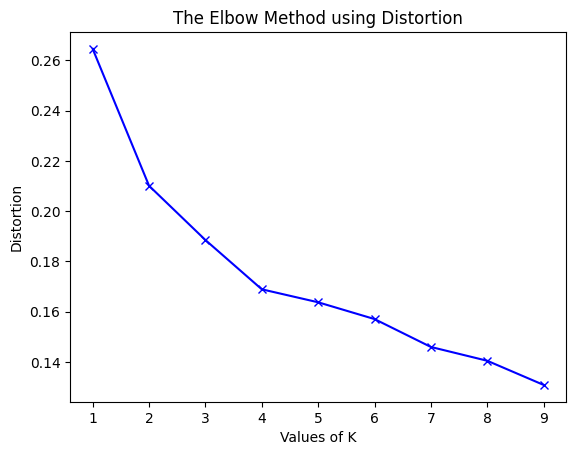

In [20]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

In [21]:
# set number of clusters
kclusters = 5

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(dfCleanByAGEBJal_sinAGEB_norm)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# add clustering labels
dfCleanByAGEBJal.insert(0, 'Cluster_Labels', kmeans.labels_)

In [46]:
dfCleanByAGEBJal

,Cluster_Labels,AGEB,total_hospitales,total_consultorios,total_medicos,total_enfermeros,total_practicantes_medicos,POBTOT,POBMAS,POBFEM,PSINDER,PDER_SS,VIVTOT,VPH_S_ELEC,VPH_AGUAFV,VPH_NODREN
0,3,1403900010350,3,63,78,84,70,3820,1816,1816,1816,1816,1443,0,0,0
1,2,1402300010153,1,0,0,0,0,3495,1712,1712,1712,1712,1177,0,0,0
2,3,1400100010122,3,6,11,8,0,1286,644,644,644,644,407,0,0,0
3,3,1400200010030,3,8,11,6,0,3574,1767,1767,1767,1767,1329,3,0,3
4,2,1400200020045,1,3,4,3,0,4496,2194,2194,2194,2194,1418,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,1,1400800010814,1,6,3,6,0,2006,987,987,987,987,640,0,0,0
508,1,1400700010060,1,3,3,8,0,219,111,111,111,111,85,0,0,0
509,1,1401300010265,1,9,16,37,4,1042,526,526,526,526,373,0,0,0
510,1,1401800010488,1,17,69,253,13,11,6,6,6,6,7,0,0,0


In [ ]:
dfCleanByAGEBJal.to_csv("DF_CON_AGEBS_JAL.csv", index=False)

In [45]:
#Cluster 1
cluster_1 = dfCleanByAGEBJal.loc[dfCleanByAGEBJal['Cluster_Labels'] == 0, dfCleanByAGEBJal.columns[[1] + list(range(1, dfCleanByAGEBJal.shape[1]))]]
cluster_1

,AGEB,AGEB,total_hospitales,total_consultorios,total_medicos,total_enfermeros,total_practicantes_medicos,POBTOT,POBMAS,POBFEM,PSINDER,PDER_SS,VIVTOT,VPH_S_ELEC,VPH_AGUAFV,VPH_NODREN
28,1403900011170,1403900011170,7,275,1341,3164,1309,4531,2234,2234,2234,2234,1922,0,0,0
247,1412000010369,1412000010369,1,187,496,2045,908,4739,2277,2277,2277,2277,1525,0,0,0


<AxesSubplot: xlabel='AGEB'>

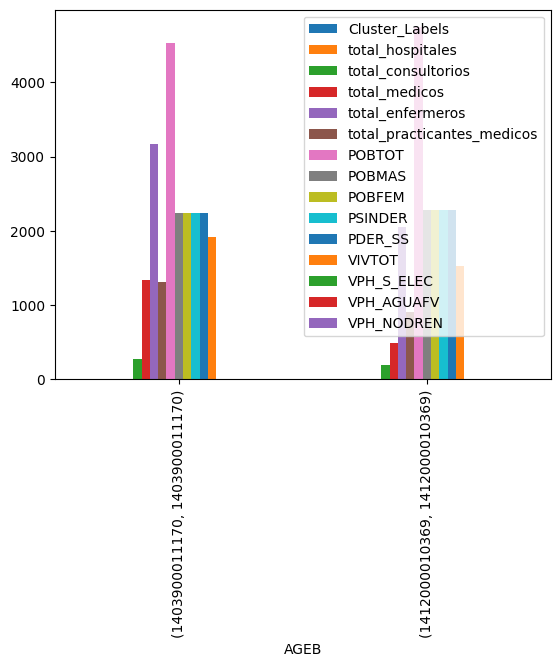

In [44]:
#con este grafico no se entiende nada 
cluster_1.set_index('AGEB').plot(kind='bar')

In [25]:
from sklearn.decomposition import PCA
pca= PCA(n_components=2)
dfCleanByAGEBJal_reduced = pca.fit_transform(dfCleanByAGEBJal_sinAGEB_norm) 
dfCleanByAGEBJal_reduced_df = pd.DataFrame(data = dfCleanByAGEBJal_reduced, columns = ['componente_1','componente_2'])
nombres_agebs = pd.concat([dfCleanByAGEBJal_reduced_df, dfCleanByAGEBJal[['Cluster_Labels']]], axis=1)
nombres_agebs

,componente_1,componente_2,Cluster_Labels
0,0.167608,0.322945,3
1,0.134518,-0.066343,2
2,-0.208989,0.217267,3
3,0.142717,0.239464,3
4,0.265947,-0.055134,2
...,...,...,...
507,-0.078573,-0.074446,1
508,-0.327887,-0.092931,1
509,-0.206588,-0.074784,1
510,-0.353278,-0.052708,1


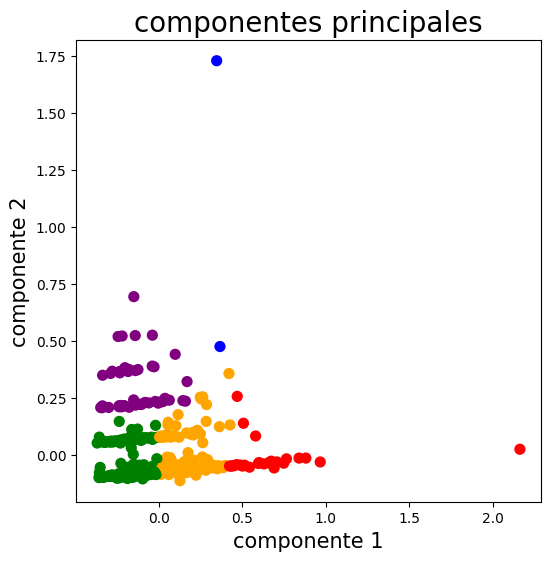

In [26]:
fig = plt.figure(figsize = (6,6))

ax= fig.add_subplot(1,1,1)
ax.set_xlabel('componente 1', fontsize = 15)
ax.set_ylabel('componente 2', fontsize = 15)
ax.set_title('componentes principales', fontsize = 20)

color_theme = np.array(["blue","green","orange","purple","red","brown","gray"])
ax.scatter(x = nombres_agebs.componente_1, y = nombres_agebs.componente_2, 
           c=color_theme[nombres_agebs.Cluster_Labels], s=50)
plt.show()

In [29]:
#Cluster 2
cluster_2 = dfCleanByAGEBJal.loc[dfCleanByAGEBJal['Cluster_Labels'] == 1, dfCleanByAGEBJal.columns[[1] + list(range(5, dfCleanByAGEBJal.shape[1]))]]
cluster_2

,AGEB,total_enfermeros,total_practicantes_medicos,POBTOT,POBMAS,POBFEM,PSINDER,PDER_SS,VIVTOT,VPH_S_ELEC,VPH_AGUAFV,VPH_NODREN
5,1400300010146,7,0,565,297,297,297,297,185,0,0,0
6,1400500010066,3,0,2277,1092,1092,1092,1092,712,0,0,3
8,1400800010195,7,0,2166,1057,1057,1057,1057,782,0,0,0
14,1401800010276,8,0,1040,507,507,507,507,360,0,0,0
15,1401900010131,7,2,1086,549,549,549,549,376,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
507,1400800010814,6,0,2006,987,987,987,987,640,0,0,0
508,1400700010060,8,0,219,111,111,111,111,85,0,0,0
509,1401300010265,37,4,1042,526,526,526,526,373,0,0,0
510,1401800010488,253,13,11,6,6,6,6,7,0,0,0


In [30]:
#Cluster 3
cluster_3 = dfCleanByAGEBJal.loc[dfCleanByAGEBJal['Cluster_Labels'] == 2, dfCleanByAGEBJal.columns[[1] + list(range(5, dfCleanByAGEBJal.shape[1]))]]
cluster_3

,AGEB,total_enfermeros,total_practicantes_medicos,POBTOT,POBMAS,POBFEM,PSINDER,PDER_SS,VIVTOT,VPH_S_ELEC,VPH_AGUAFV,VPH_NODREN
1,1402300010153,0,0,3495,1712,1712,1712,1712,1177,0,0,0
4,1400200020045,3,0,4496,2194,2194,2194,2194,1418,0,0,0
7,1400600010203,19,2,2908,1381,1381,1381,1381,1098,3,4,0
9,1400900010065,2,0,2800,1357,1357,1357,1357,908,0,0,0
10,1401300010053,17,0,3761,1816,1816,1816,1816,1319,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
490,1402300010223,0,0,2948,1436,1436,1436,1436,1039,0,0,0
495,1410100011639,0,0,3465,1750,1750,1750,1750,1005,0,0,0
496,1409800012771,0,0,3777,1889,1889,1889,1889,1185,0,0,0
497,140970822155A,0,0,3676,1759,1759,1759,1759,1303,0,0,0


In [32]:
#Cluster 4
cluster_4 = dfCleanByAGEBJal.loc[dfCleanByAGEBJal['Cluster_Labels'] == 3, dfCleanByAGEBJal.columns[[1] + list(range(5, dfCleanByAGEBJal.shape[1]))]]
cluster_4

,AGEB,total_enfermeros,total_practicantes_medicos,POBTOT,POBMAS,POBFEM,PSINDER,PDER_SS,VIVTOT,VPH_S_ELEC,VPH_AGUAFV,VPH_NODREN
0,1403900010350,84,70,3820,1816,1816,1816,1816,1443,0,0,0
2,1400100010122,8,0,1286,644,644,644,644,407,0,0,0
3,1400200010030,6,0,3574,1767,1767,1767,1767,1329,3,0,3
12,1401600010093,12,4,2706,1292,1292,1292,1292,905,0,0,4
13,1401700010071,14,1,1761,850,850,850,850,733,0,0,3
24,1403300010094,14,3,1142,522,522,522,522,589,0,0,0
25,1403500010296,44,7,1358,630,630,630,630,593,0,0,0
27,1403700010110,59,5,2485,1201,1201,1201,1201,923,0,5,0
49,1404500010108,9,4,1046,497,497,497,497,406,0,0,0
60,1406600010220,28,2,2627,1240,1240,1240,1240,916,0,0,0


In [35]:
#Cluster 5
cluster_5 = dfCleanByAGEBJal.loc[dfCleanByAGEBJal['Cluster_Labels'] == 4, dfCleanByAGEBJal.columns[[1] + list(range(5, dfCleanByAGEBJal.shape[1]))]]
cluster_5

,AGEB,total_enfermeros,total_practicantes_medicos,POBTOT,POBMAS,POBFEM,PSINDER,PDER_SS,VIVTOT,VPH_S_ELEC,VPH_AGUAFV,VPH_NODREN
34,1403900010435,0,0,7566,3578,3578,3578,3578,2385,0,0,0
106,1412000014605,52,16,5955,2876,2876,2876,2876,2416,0,0,0
115,1403900013088,9,0,7760,3795,3795,3795,3795,2284,0,0,0
189,1412000010937,0,0,7260,3472,3472,3472,3472,2150,0,4,0
197,1409800010120,0,0,7377,3555,3555,3555,3555,2312,0,0,0
198,1409800010046,0,0,6418,3044,3044,3044,3044,1962,0,0,0
199,1403900013340,0,0,7256,3478,3478,3478,3478,2544,0,0,0
201,1412002314179,0,0,8218,4052,4052,4052,4052,2115,0,3,0
253,1403900013177,13,0,7661,3794,3794,3794,3794,1912,5,0,0
257,1403900013798,6,0,5737,2832,2832,2832,2832,1681,0,0,0
